# Sales Analyses

- Importing Necessary Libraries
- Importando bibliotecas necessárias

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Merging 12 months of sales data into one file.
### Mesclando 12 meses de dados de vendas em um arquivo.

In [2]:
# Load the sales data from April 2019
# Carrega os dados de vendas de abril de 2019
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [3]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Converting data typeo

In [ ]:
# Convert the 'Quantity Ordered' column to numeric and handle errors
# Converte a coluna 'Quantity Ordered' para numérico e lida com erros
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
# Replace missing values with 0 and convert to integer
# Substitui valores ausentes por 0 e converte para inteiro
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].fillna(0).astype(int)
# Convert the 'Price Each' column to numeric
# Converte a coluna 'Price Each' para numérico
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
# Convert 'Order Date' to datetime format
# Converte 'Order Date' para o formato datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

In [5]:
print(all_data.dtypes)

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


# Clean the data

In [6]:
# Count and print the number of null values in each column
# Conta e imprime o número de valores nulos em cada coluna
null_counts = all_data.isna().sum()

print('Contagem de valores nulos por coluna:')
print(null_counts[null_counts > 0])

Contagem de valores nulos por coluna:
Order ID            544
Product             544
Price Each          899
Order Date          899
Purchase Address    544
dtype: int64


In [7]:
# Drop rows with any null values
# Remove linhas com qualquer valor nulo
all_data = all_data.dropna(how='any')

# Confirm that no null values remain
# Confirma que não restam valores nulos
print(all_data.isna().sum())

In [9]:
all_data.to_csv('all_data2.csv', index=False)
all_data2 = pd.read_csv('all_data2.csv')

In [10]:
# Convert 'Order ID' to string
# Converte 'Order ID' para string
all_data2['Order ID'] = all_data2['Order ID'].astype(str)

print(all_data2.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


### Adding new columns

### Month Column

In [11]:
# Convert 'Order Date' to datetime format (again for safety)
# Converte 'Order Date' para o formato datetime (novamente por segurança)
all_data2['Order Date'] = pd.to_datetime(all_data2['Order Date'], errors='coerce')

# Extract the month from 'Order Date' and create a new column
# Extrai o mês de 'Order Date' e cria uma nova coluna
all_data2['Month'] = all_data2['Order Date'].dt.strftime('%B')

all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


### City Column

In [12]:
# Extract the city from the 'Purchase Address' and create a new column
# Extrai a cidade do 'Purchase Address' e cria uma nova coluna
all_data2['City'] = all_data2['Purchase Address'].apply(lambda x: x.split(',')[1])

all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Los Angeles


# What was the best month for sales? How much was earned that month?

In [13]:
# Calculate total sales by multiplying quantity ordered by price each
# Calcula o total de vendas multiplicando a quantidade pedida pelo preço de cada item
all_data2['Total Sales'] = all_data2['Quantity Ordered'] * all_data2['Price Each']
# Group by month and sum the total sales
# Agrupa por mês e soma o total de vendas
monthly_sales = all_data2.groupby('Month')['Total Sales'].sum()

best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()

print(f"O melhor mês para vendas foi {best_month} com um total de ${best_month_sales:.2f}.")

O melhor mês para vendas foi December com um total de $4613443.34.


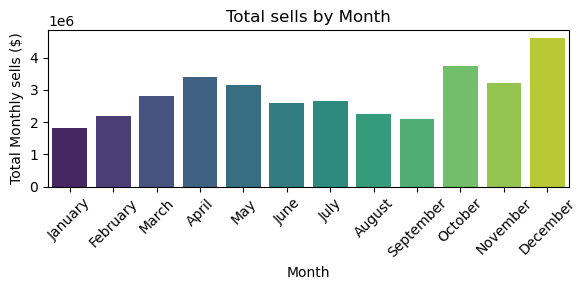

In [14]:
# Define the correct order for the months
# Define a ordem correta dos meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the monthly sales data according to the defined month order
# Reordena os dados de vendas mensais de acordo com a ordem dos meses definida
monthly_sales = monthly_sales.reindex(month_order)

plt.figure(figsize=(6, 3))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Monthly sells ($)')
plt.title('Total sells by Month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### What city sold the most product?

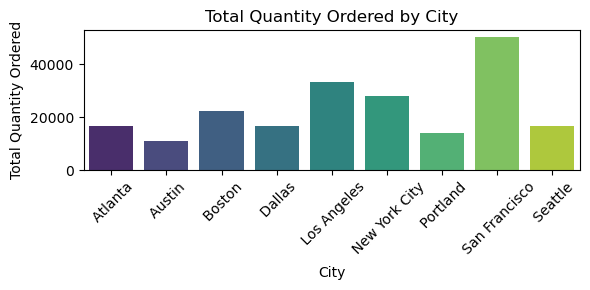

In [15]:
# Group by city and sum the quantity ordered
# Agrupa por cidade e soma a quantidade pedida
city_sells = all_data2.groupby('City')['Quantity Ordered'].sum()

plt.figure(figsize=(6, 3))
sns.barplot(x=city_sells.index, y=city_sells.values, palette='viridis')
plt.xlabel('City')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Quantity Ordered by City')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [16]:
all_data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Los Angeles,11.99


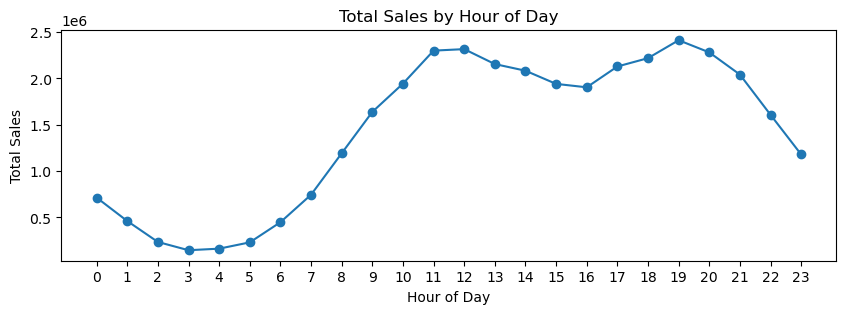

In [17]:
# Extract the hour from 'Order Date' and create a new column
# Extrai a hora de 'Order Date' e cria uma nova coluna
all_data2['Hour'] = all_data2['Order Date'].dt.hour

# Group by hour and sum the total sales
# Agrupa por hora e soma o total de vendas
sales_by_hour = all_data2.groupby('Hour')['Total Sales'].sum()

plt.figure(figsize=(10, 3))
plt.plot(sales_by_hour.index, sales_by_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour of Day')
plt.xticks(range(24))

plt.show()

### What products are most often sold together?

In [18]:
# Import necessary libraries for finding product pairs
# Importa as bibliotecas necessárias para encontrar pares de produtos
from itertools import combinations
from collections import Counter

In [19]:
# Group the data by 'Order ID' and create a list of products for each order
# Agrupa os dados por 'Order ID' e cria uma lista de produtos para cada pedido
grouped = all_data2.groupby('Order ID')['Product'].apply(list)

# Create a list of all product pairs
# Gera uma lista de todos os pares de produtos
pairs = []
for products in grouped:
    pairs.extend(combinations(sorted(products), 2))

# Count the frequency of each pair
# Conta a frequência de cada par de produtos
pair_counts = Counter(pairs)

# Convert to DataFrame and sort by count
# Converte o contador para um DataFrame e ordena pela contagem
pair_df = pd.DataFrame(pair_counts.items(), columns=['Product Pair', 'Count'])
pair_df = pair_df.sort_values(by='Count', ascending=False)

pair_df.head()

,Product Pair,Count
11,"(Lightning Charging Cable, iPhone)",1015
3,"(Google Phone, USB-C Charging Cable)",999
8,"(Wired Headphones, iPhone)",462
17,"(Google Phone, Wired Headphones)",423
5,"(Apple Airpods Headphones, iPhone)",373


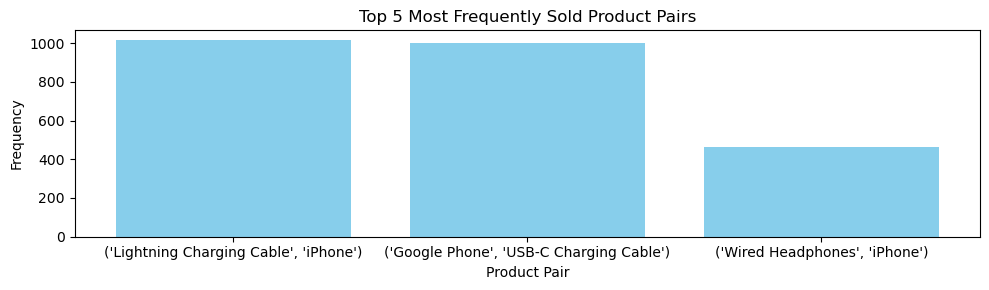

In [20]:
# Select the top 3 most frequently sold product pairs
# Seleciona os 3 pares de produtos mais vendidos com maior frequência
top_3_pairs = pair_df.head(3)

plt.figure(figsize=(10, 3))
plt.bar(top_3_pairs['Product Pair'].astype(str), top_3_pairs['Count'], color='skyblue')
plt.xlabel('Product Pair')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequently Sold Product Pairs')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### What product sold the most? Why do you think it sold the most?

In [21]:
product_sales = all_data2.groupby('Product')['Quantity Ordered'].sum()

most_sold_product = product_sales.idxmax()
most_sold_quantity = product_sales.max()

print(f"The most sold product is '{most_sold_product}' with {most_sold_quantity} units sold.")

The most sold product is 'AAA Batteries (4-pack)' with 31017 units sold.
